In [2]:
import pandas as pd
import numpy  as np

dados = '/content/drive/MyDrive/Colab Notebooks/Dados/dados_estudantes_desistir.csv'

df_original = pd.read_csv(dados)
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

In [3]:
df_original['Target'].unique()

array(['Desistente', 'Graduado', 'Matriculado'], dtype=object)

In [8]:
df_original['Estado civil'].value_counts(normalize=True)*100

Solteiro               88.584991
Casado                  8.566908
Divorciado              2.056962
União Estável           0.565099
Legalmente Separado     0.135624
Viúvo                   0.090416
Name: Estado civil, dtype: float64

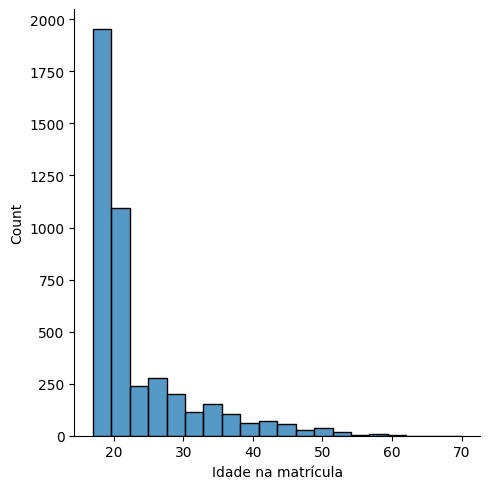

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(df_original['Idade na matrícula'], bins=20)
plt.show()

In [12]:
color_dict = {'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'}
sns.set_palette(list(color_dict.values()))

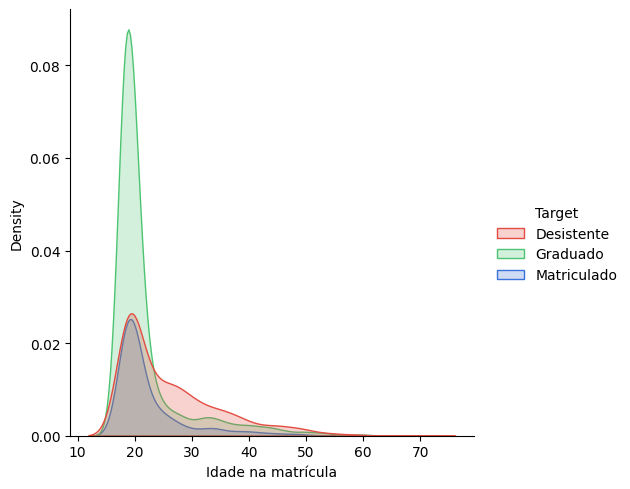

In [14]:
sns.displot(data=df_original, x='Idade na matrícula', hue='Target', kind='kde', fill=True)
plt.show()

In [15]:
df_original['Estrangeiro'].value_counts(normalize=True)*100

Não    97.513562
Sim     2.486438
Name: Estrangeiro, dtype: float64

In [17]:
df_original['Sexo'].value_counts(normalize=True)*100

Feminino     64.82821
Masculino    35.17179
Name: Sexo, dtype: float64

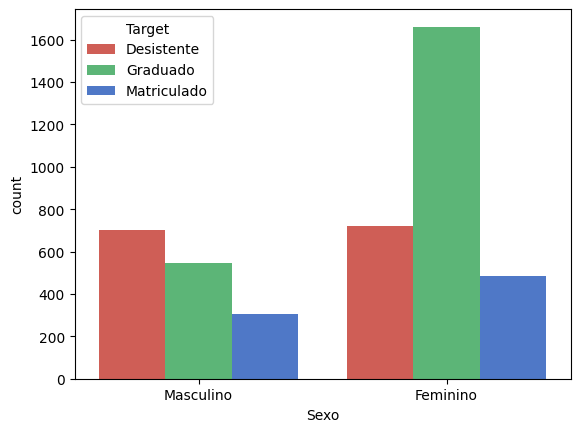

In [18]:
sns.countplot(x='Sexo', hue='Target', data=df_original)
plt.show()

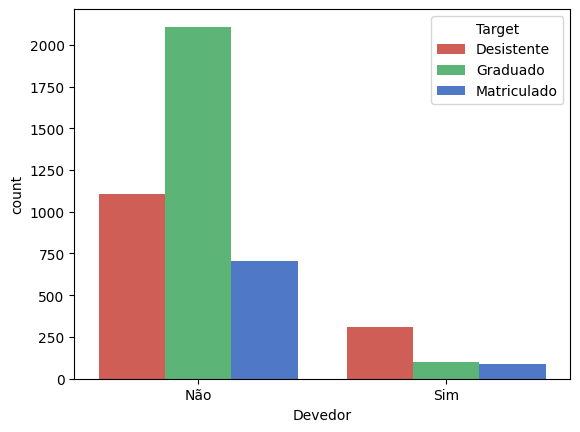

In [19]:
sns.countplot(x='Devedor', hue='Target', data=df_original)
plt.show()

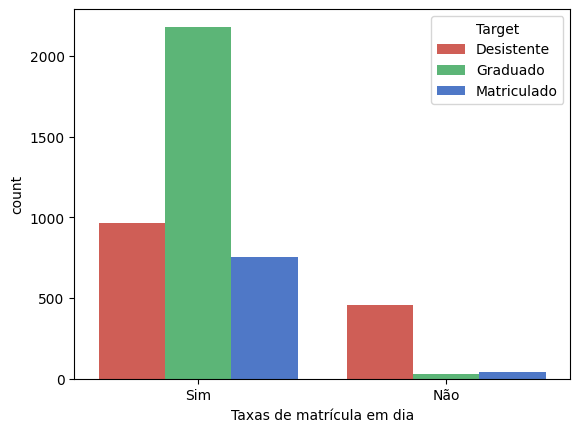

In [20]:
sns.countplot(x='Taxas de matrícula em dia', hue='Target', data=df_original)
plt.show()

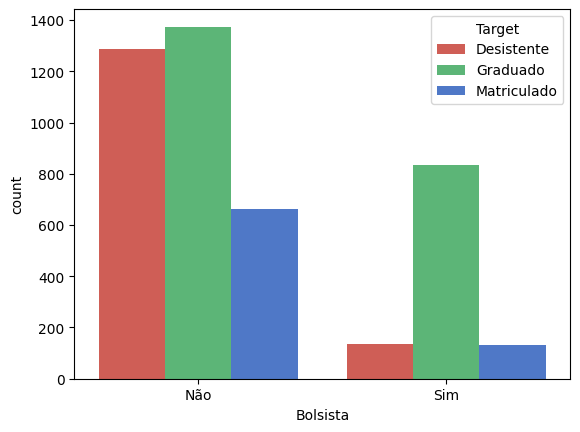

In [21]:
sns.countplot(x='Bolsista', hue='Target', data=df_original)
plt.show()

In [23]:
import plotly.express as px

contagem = df_original.groupby(['Curso', 'Target']).size().reset_index(name='Contagem')

contagem['Porcentagem'] = contagem.groupby('Curso')['Contagem'].transform(lambda x: (x/x.sum())*100)

fig = px.bar(contagem, y='Curso', x='Porcentagem', color='Target', orientation='h', color_discrete_map={'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'})
fig.show()

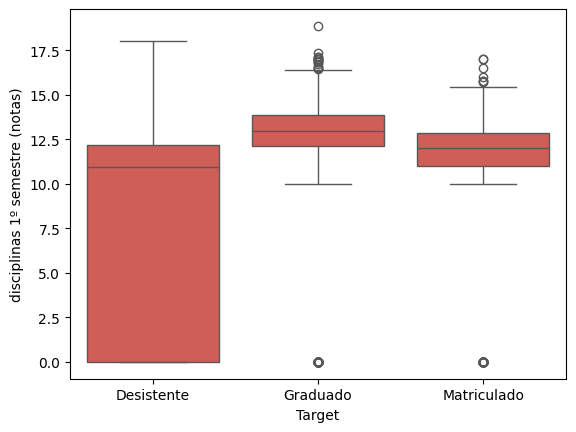

In [25]:
sns.boxplot(x='Target', y='disciplinas 1º semestre (notas)', data=df_original)
plt.show()

In [26]:
df_original['Target'].value_counts(normalize=True)*100

Graduado       49.932188
Desistente     32.120253
Matriculado    17.947559
Name: Target, dtype: float64

In [28]:
from sklearn.preprocessing import OneHotEncoder

colunas_categoricas = ['Migração', 'Sexo','Estrangeiro', 'Necessidades educacionais especiais', 'Devedor',
                     'Taxas de matrícula em dia', 'Bolsista', 'Período','Estado civil', 'Curso', 'Qualificação prévia']



In [29]:
encoder = OneHotEncoder(drop='if_binary')

df_categorico = df_original[colunas_categoricas]

df_encoded = pd.DataFrame(encoder.fit_transform(df_categorico).toarray(),
                          columns=encoder.get_feature_names_out(colunas_categoricas))

df_final = pd.concat([df_original.drop(columns=colunas_categoricas), df_encoded], axis=1)

In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 65 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Idade na matrícula                                                            4424 non-null   int64  
 1   Taxa de desemprego                                                            4424 non-null   float64
 2   Taxa de inflação                                                              4424 non-null   float64
 3   PIB                                                                           4424 non-null   float64
 4   disciplinas 1º semestre (creditadas)                                          4424 non-null   int64  
 5   disciplinas 1º semestre (matriculadas)                                        4424 non-null   int64  
 6   disciplinas 1º semestre (avaliaç

In [33]:
X = df_final.drop('Target', axis=1)
y = df_final['Target']

In [35]:
from sklearn.model_selection import train_test_split

X, X_teste, y, y_teste = train_test_split(X,y, test_size=0.15, stratify=y, random_state=0)
X_treino, X_val, y_treino, y_val = train_test_split(X,y, stratify=y, random_state=0)

In [36]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=0)
modelo_rf.fit(X_treino,y_treino)

y_pred = modelo_rf.predict(X_val)
print(f'Acurácia de treino: {modelo_rf.score(X_treino,y_treino)}')
print(f'Acurácia de validação: {modelo_rf.score(X_val,y_val)}')

Acurácia de treino: 0.9970796829370046
Acurácia de validação: 0.7747183979974969


In [46]:
modelo_rf = RandomForestClassifier(random_state=0, max_depth=10)
modelo_rf.fit(X_treino,y_treino)

y_pred = modelo_rf.predict(X_val)
print(f'Acurácia de treino: {modelo_rf.score(X_treino,y_treino)}')
print(f'Acurácia de validação: {modelo_rf.score(X_val,y_val)}')

Acurácia de treino: 0.9023779724655819
Acurácia de validação: 0.7809762202753442


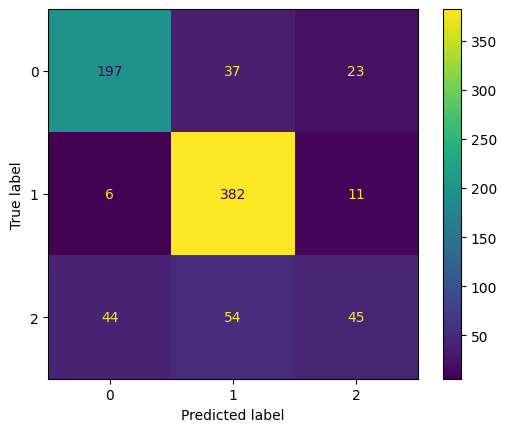

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matriz_confusao = confusion_matrix(y_val, y_pred)

visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao)
visualizacao.plot();

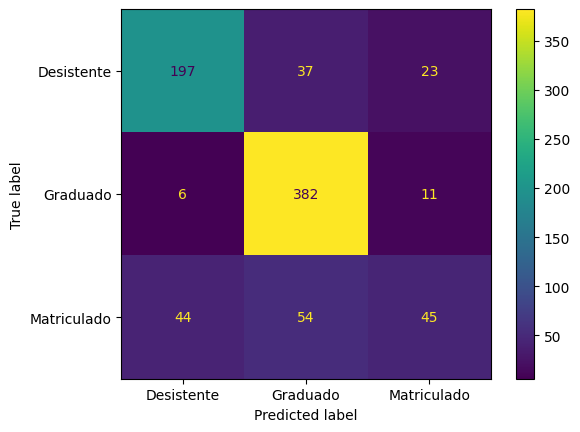

In [48]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=modelo_rf.classes_)
visualizacao.plot();

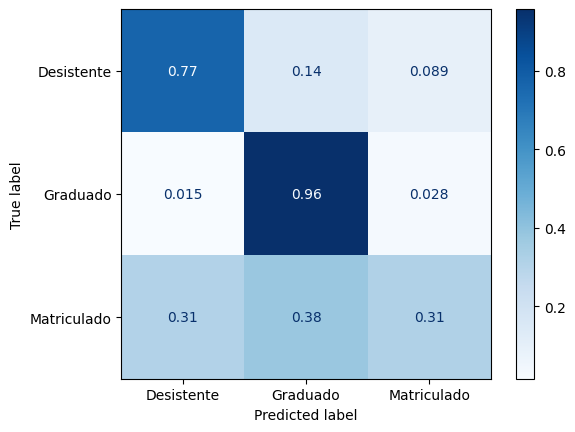

In [49]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues')

In [52]:
from sklearn.metrics import classification_report

report = classification_report(y_val, y_pred)
print('Relátorio de Classificação:\n', report)

Relátorio de Classificação:
               precision    recall  f1-score   support

  Desistente       0.80      0.77      0.78       257
    Graduado       0.81      0.96      0.88       399
 Matriculado       0.57      0.31      0.41       143

    accuracy                           0.78       799
   macro avg       0.72      0.68      0.69       799
weighted avg       0.76      0.78      0.76       799



In [53]:
y_treino.value_counts()

Graduado       1196
Desistente      770
Matriculado     431
Name: Target, dtype: int64

In [55]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=0)
X_balanceado, y_balanceado = oversample.fit_resample(X_treino, y_treino)

In [56]:
y_balanceado.value_counts()

Graduado       1196
Desistente     1196
Matriculado    1196
Name: Target, dtype: int64

In [58]:
modelo_rf = RandomForestClassifier(random_state=0, max_depth=10)
modelo_rf.fit(X_balanceado,y_balanceado)

y_pred = modelo_rf.predict(X_val)
print(f'Acurácia de treino: {modelo_rf.score(X_balanceado,y_balanceado)}')
print(f'Acurácia de validação: {modelo_rf.score(X_val,y_val)}')

Acurácia de treino: 0.9002229654403567
Acurácia de validação: 0.7647058823529411


Relátorio de Classificação:
               precision    recall  f1-score   support

  Desistente       0.84      0.72      0.77       257
    Graduado       0.84      0.88      0.86       399
 Matriculado       0.47      0.52      0.49       143

    accuracy                           0.76       799
   macro avg       0.71      0.71      0.71       799
weighted avg       0.77      0.76      0.77       799



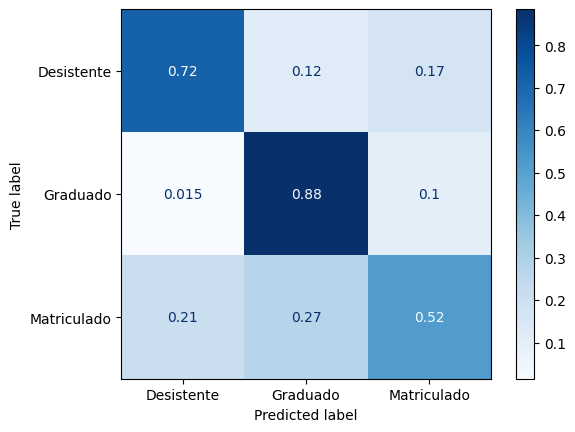

In [60]:
report = classification_report(y_val, y_pred)
print('Relátorio de Classificação:\n', report)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');

In [62]:
from imblearn.pipeline import Pipeline as imbpipeline

modelo = RandomForestClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()), ('floresta', modelo)])

In [67]:
from sklearn.model_selection import cross_validate, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall_weighted')
cv_resultados['test_score']

array([0.7625    , 0.7370892 , 0.76995305, 0.7543036 , 0.75273865])

In [68]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'intervalo de confiança: [{media - 2 * desvio_padrao}, {min(media + 2 * desvio_padrao, 1.0)}]')


intervalo de confiança: [0.733303506046567, 0.7773302967703345]


In [69]:
oversample = SMOTE(random_state=0)
X_balanceado, y_balanceado = oversample.fit_resample(X,y)

In [70]:
modelo = RandomForestClassifier(random_state=0, max_depth=10)
modelo.fit(X_balanceado,y_balanceado)
y_pred = modelo.predict(X_teste)

              precision    recall  f1-score   support

  Desistente       0.85      0.69      0.76       181
    Graduado       0.79      0.85      0.82       282
 Matriculado       0.46      0.51      0.49       101

    accuracy                           0.74       564
   macro avg       0.70      0.68      0.69       564
weighted avg       0.75      0.74      0.74       564



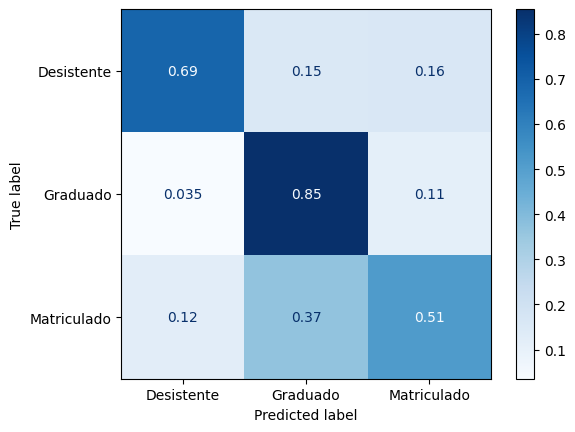

In [74]:
print(classification_report(y_teste, y_pred))
ConfusionMatrixDisplay.from_predictions(y_teste, y_pred, normalize='true', cmap='Blues');